In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
# import dataprep.eda.create_report as report
import seaborn as sns


# 1. Data Collection

In [75]:
df=pd.read_csv("hospital.csv")
df.head()

,Patient_ID,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted
0,1,69,Other,Emergency,Heart Disease,33,2,4,1,1,5,NaN,Yes
1,2,32,Female,Urgent,Diabetes,81,10,4,4,1,6,NaN,No
2,3,78,Female,Urgent,Heart Disease,75,29,4,0,3,5,Normal,No
3,4,38,Male,Elective,Diabetes,77,11,2,3,4,9,NaN,Yes
4,5,41,Female,Urgent,Diabetes,50,25,3,4,1,3,NaN,Yes


In [3]:
df.shape

(1000, 13)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Patient_ID             1000 non-null   int64 
 1   Age                    1000 non-null   int64 
 2   Gender                 1000 non-null   object
 3   Admission_Type         1000 non-null   object
 4   Diagnosis              1000 non-null   object
 5   Num_Lab_Procedures     1000 non-null   int64 
 6   Num_Medications        1000 non-null   int64 
 7   Num_Outpatient_Visits  1000 non-null   int64 
 8   Num_Inpatient_Visits   1000 non-null   int64 
 9   Num_Emergency_Visits   1000 non-null   int64 
 10  Num_Diagnoses          1000 non-null   int64 
 11  A1C_Result             566 non-null    object
 12  Readmitted             1000 non-null   object
dtypes: int64(8), object(5)
memory usage: 101.7+ KB


# 2.Dealing with null values

In [59]:
df.isnull().sum()

Patient_ID                 0
Age                        0
Gender                     0
Admission_Type             0
Diagnosis                  0
Num_Lab_Procedures         0
Num_Medications            0
Num_Outpatient_Visits      0
Num_Inpatient_Visits       0
Num_Emergency_Visits       0
Num_Diagnoses              0
A1C_Result               434
Readmitted                 0
dtype: int64

In [76]:
df['A1C_Result'].fillna(df['A1C_Result'].mode().iloc[0],inplace=True)


In [77]:
df.isnull().sum()

Patient_ID               0
Age                      0
Gender                   0
Admission_Type           0
Diagnosis                0
Num_Lab_Procedures       0
Num_Medications          0
Num_Outpatient_Visits    0
Num_Inpatient_Visits     0
Num_Emergency_Visits     0
Num_Diagnoses            0
A1C_Result               0
Readmitted               0
dtype: int64

In [63]:
df.describe()

,Patient_ID,Age,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,504.994949,50.671717,50.697980,15.719192,2.018182,2.016162,1.946465,4.998990
std,286.770863,19.739924,28.035343,8.222631,1.399723,1.415550,1.405666,2.665929
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,258.250000,34.000000,27.000000,9.000000,1.000000,1.000000,1.000000,3.000000
50%,505.500000,50.000000,52.000000,16.000000,2.000000,2.000000,2.000000,5.000000
75%,752.750000,68.000000,74.000000,23.000000,3.000000,3.000000,3.000000,7.000000
max,1000.000000,84.000000,99.000000,35.000000,4.000000,4.000000,4.000000,9.000000


In [78]:
df=df[df['Age']!=150]
df.head()

,Patient_ID,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted
0,1,69,Other,Emergency,Heart Disease,33,2,4,1,1,5,Abnormal,Yes
1,2,32,Female,Urgent,Diabetes,81,10,4,4,1,6,Abnormal,No
2,3,78,Female,Urgent,Heart Disease,75,29,4,0,3,5,Normal,No
3,4,38,Male,Elective,Diabetes,77,11,2,3,4,9,Abnormal,Yes
4,5,41,Female,Urgent,Diabetes,50,25,3,4,1,3,Abnormal,Yes


# 3.Converting categorical to numerical

In [64]:
df['Gender'].unique()
df['Admission_Type'].unique()
df['Diagnosis'].unique()
df['A1C_Result'].unique()

array(['Abnormal', 'Normal'], dtype=object)

In [79]:
df['Gender']=OrdinalEncoder().fit_transform(df[['Gender']])
df['Admission_Type']=OrdinalEncoder().fit_transform(df[['Admission_Type']])
#df['Diagnosis']=OrdinalEncoder().fit_transform(df[['Diagnosis']])
df['A1C_Result']=OrdinalEncoder().fit_transform(df[['A1C_Result']])
df['Readmitted']=OrdinalEncoder().fit_transform(df[['Readmitted']])

In [66]:
df.head()

,Patient_ID,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted
0,1,69,2.0,1.0,Heart Disease,33,2,4,1,1,5,0.0,1.0
1,2,32,0.0,2.0,Diabetes,81,10,4,4,1,6,0.0,0.0
2,3,78,0.0,2.0,Heart Disease,75,29,4,0,3,5,1.0,0.0
3,4,38,1.0,0.0,Diabetes,77,11,2,3,4,9,0.0,1.0
4,5,41,0.0,2.0,Diabetes,50,25,3,4,1,3,0.0,1.0


In [80]:
df['Gender']=df['Gender'].astype(np.int64)
df['Admission_Type']=df['Admission_Type'].astype(np.int64)
df["A1C_Result"]=df["A1C_Result"].astype(np.int64)
df["Readmitted"]=df["Readmitted"].astype(np.int64)

In [81]:
df.dtypes

Patient_ID                int64
Age                       int64
Gender                    int64
Admission_Type            int64
Diagnosis                object
Num_Lab_Procedures        int64
Num_Medications           int64
Num_Outpatient_Visits     int64
Num_Inpatient_Visits      int64
Num_Emergency_Visits      int64
Num_Diagnoses             int64
A1C_Result                int64
Readmitted                int64
dtype: object

In [82]:
df['service_utilization']=df['Num_Outpatient_Visits']+df['Num_Inpatient_Visits']+df['Num_Emergency_Visits']
df.head()

,Patient_ID,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted,service_utilization
0,1,69,2,1,Heart Disease,33,2,4,1,1,5,0,1,6
1,2,32,0,2,Diabetes,81,10,4,4,1,6,0,0,9
2,3,78,0,2,Heart Disease,75,29,4,0,3,5,1,0,7
3,4,38,1,0,Diabetes,77,11,2,3,4,9,0,1,9
4,5,41,0,2,Diabetes,50,25,3,4,1,3,0,1,8


In [83]:
age_bins = [18, 35, 50, 65, 85]
age_labels = ['Young Adult','Adult', 'Middle-Aged Adult', 'Senior Adult']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
df.head()

,Patient_ID,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted,service_utilization,Age Group
0,1,69,2,1,Heart Disease,33,2,4,1,1,5,0,1,6,Senior Adult
1,2,32,0,2,Diabetes,81,10,4,4,1,6,0,0,9,Young Adult
2,3,78,0,2,Heart Disease,75,29,4,0,3,5,1,0,7,Senior Adult
3,4,38,1,0,Diabetes,77,11,2,3,4,9,0,1,9,Adult
4,5,41,0,2,Diabetes,50,25,3,4,1,3,0,1,8,Adult


In [70]:
df.isnull().sum()

Patient_ID               0
Age                      0
Gender                   0
Admission_Type           0
Diagnosis                0
Num_Lab_Procedures       0
Num_Medications          0
Num_Outpatient_Visits    0
Num_Inpatient_Visits     0
Num_Emergency_Visits     0
Num_Diagnoses            0
A1C_Result               0
Readmitted               0
Age Group                0
dtype: int64

In [74]:
df.dtypes

Patient_ID                    int64
Age                           int64
Gender                        int64
Admission_Type                int64
Diagnosis                    object
Num_Lab_Procedures            int64
Num_Medications               int64
Num_Outpatient_Visits         int64
Num_Inpatient_Visits          int64
Num_Emergency_Visits          int64
Num_Diagnoses                 int64
A1C_Result                    int64
Readmitted                    int64
Age Group                    object
Age_Diagnosis_Interaction    object
dtype: object

In [71]:
df['Diagnosis'].unique()

array(['Heart Disease', 'Diabetes', 'Injury', 'Infection'], dtype=object)

In [40]:
df['Age Group']=OrdinalEncoder().fit_transform(df[['Age Group']])
df["Age Group"]=df["Age Group"].astype(np.int64)


In [87]:
df['Age Group']=df['Age Group'].astype(str)
df['Diagnosis']=df['Diagnosis'].astype(str)

df['Age_Diagnosis_Interaction'] = df['Age Group'] + '_' + df['Diagnosis']
df.head()

,Patient_ID,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted,service_utilization,Age Group,Age_Diagnosis_Interaction
0,1,69,2,1,Heart Disease,33,2,4,1,1,5,0,1,6,Senior Adult,Senior Adult_Heart Disease
1,2,32,0,2,Diabetes,81,10,4,4,1,6,0,0,9,Young Adult,Young Adult_Diabetes
2,3,78,0,2,Heart Disease,75,29,4,0,3,5,1,0,7,Senior Adult,Senior Adult_Heart Disease
3,4,38,1,0,Diabetes,77,11,2,3,4,9,0,1,9,Adult,Adult_Diabetes
4,5,41,0,2,Diabetes,50,25,3,4,1,3,0,1,8,Adult,Adult_Diabetes


In [89]:
df['Age Group'].unique()

array(['Senior Adult', 'Young Adult', 'Adult', 'Middle-Aged Adult'],
      dtype=object)

In [97]:
severity_scores = {
    'Heart Disease': 3,  # Example severity score for heart disease
    'Diabetes': 2,        # Example severity score for diabetes
    'Injury': 1,          # Example severity score for injury
    'Infection': 2        # Example severity score for infection
}

# Define weights for age groups
age_group_weights = {
    'Young Adult': 1,
    'Adult':2,
    'Middle-Aged Adult': 3,
    'Senior Adult': 4
}

# Assign severity scores to the DataFrame and multiply by age group weights
for condition, score in severity_scores.items():
    df[f'{condition}_Severity'] = (df['Diagnosis']==condition) * score * df['Age Group'].map(age_group_weights)

In [99]:
df.head()

,Patient_ID,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted,service_utilization,Age Group,Age_Diagnosis_Interaction,Heart Disease_Severity,Diabetes_Severity,Injury_Severity,Infection_Severity
0,1,69,2,1,Heart Disease,33,2,4,1,1,5,0,1,6,Senior Adult,Senior Adult_Heart Disease,12,0,0,0
1,2,32,0,2,Diabetes,81,10,4,4,1,6,0,0,9,Young Adult,Young Adult_Diabetes,0,2,0,0
2,3,78,0,2,Heart Disease,75,29,4,0,3,5,1,0,7,Senior Adult,Senior Adult_Heart Disease,12,0,0,0
3,4,38,1,0,Diabetes,77,11,2,3,4,9,0,1,9,Adult,Adult_Diabetes,0,4,0,0
4,5,41,0,2,Diabetes,50,25,3,4,1,3,0,1,8,Adult,Adult_Diabetes,0,4,0,0


In [101]:
df['Diagnosis']=LabelEncoder().fit_transform(df[['Diagnosis']])
df['Age Group']=OrdinalEncoder().fit_transform(df[['Age Group']])
df['Age_Diagnosis_Interaction']=OrdinalEncoder().fit_transform(df[['Age_Diagnosis_Interaction']])

In [104]:
df["Age Group"]=df["Age Group"].astype(np.int64)
df['Age_Diagnosis_Interaction']=df['Age_Diagnosis_Interaction'].astype(np.int64)

In [105]:
df.head()

,Patient_ID,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted,service_utilization,Age Group,Age_Diagnosis_Interaction,Heart Disease_Severity,Diabetes_Severity,Injury_Severity,Infection_Severity
0,1,69,2,1,1,33,2,4,1,1,5,0,1,6,2,9,12,0,0,0
1,2,32,0,2,0,81,10,4,4,1,6,0,0,9,3,12,0,2,0,0
2,3,78,0,2,1,75,29,4,0,3,5,1,0,7,2,9,12,0,0,0
3,4,38,1,0,0,77,11,2,3,4,9,0,1,9,0,0,0,4,0,0
4,5,41,0,2,0,50,25,3,4,1,3,0,1,8,0,0,0,4,0,0


In [27]:
# find outliers - box plot & skewed data - hist plot
def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

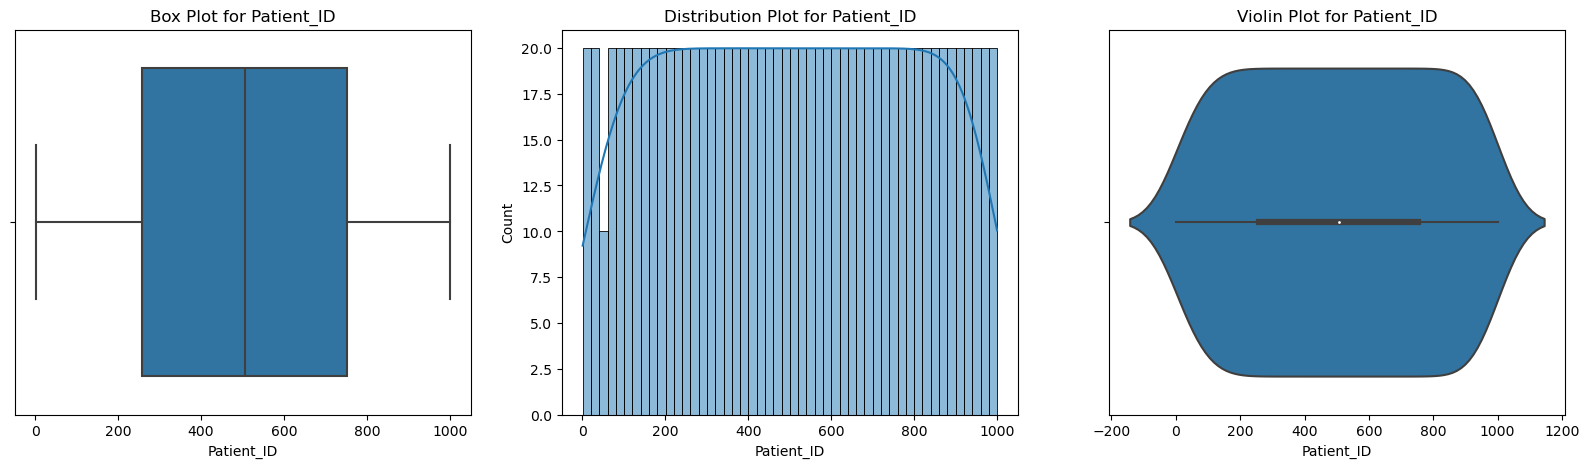

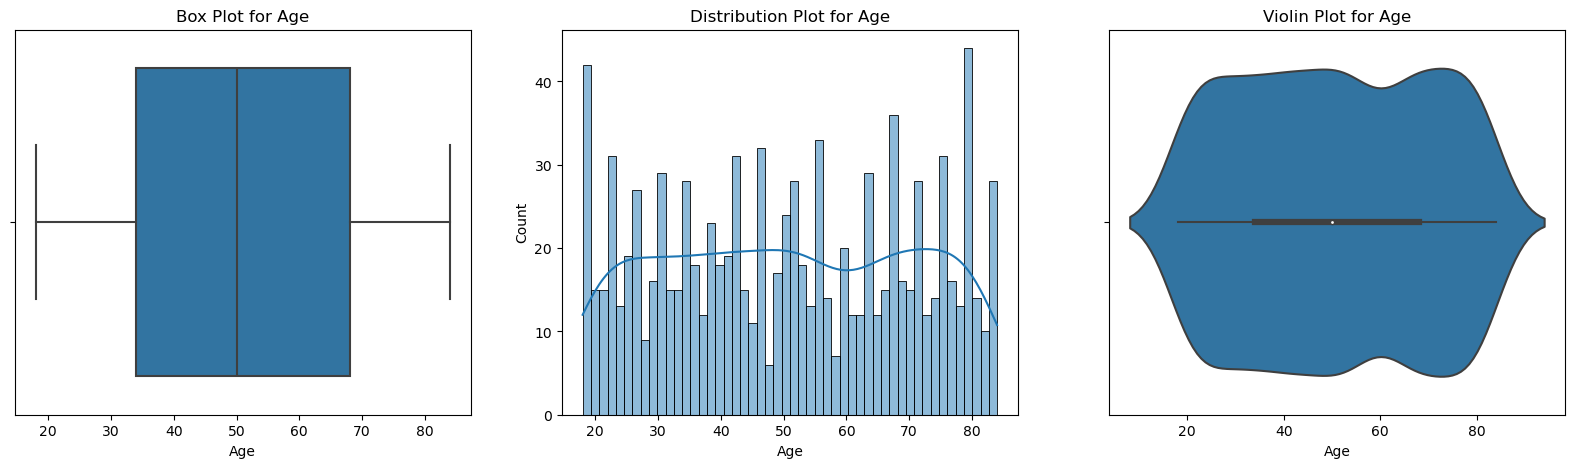

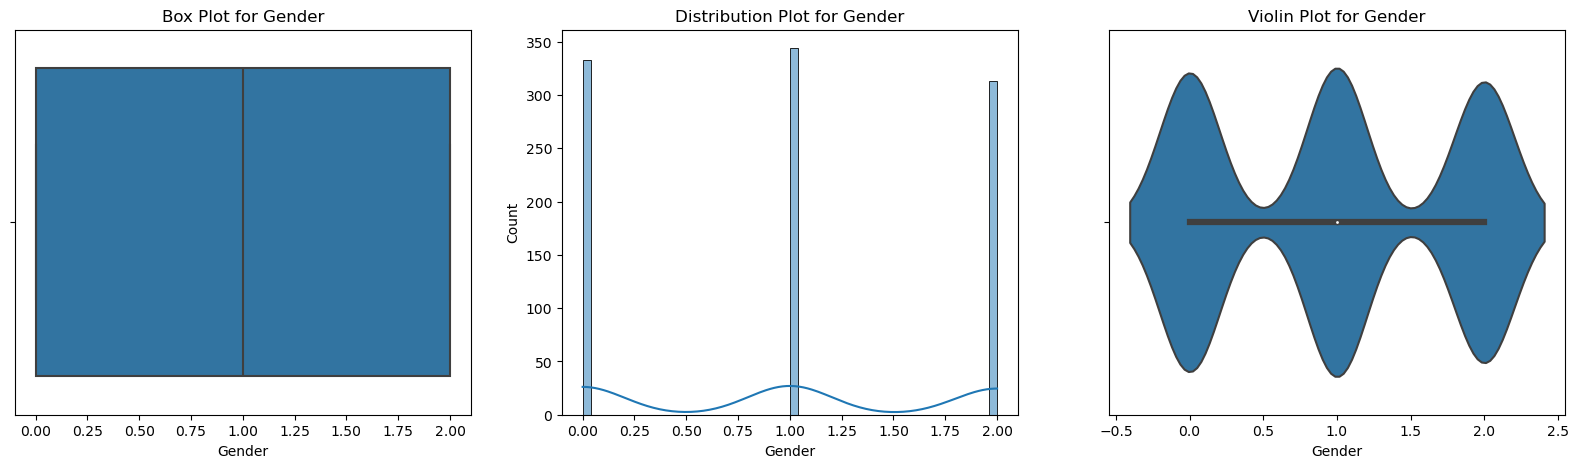

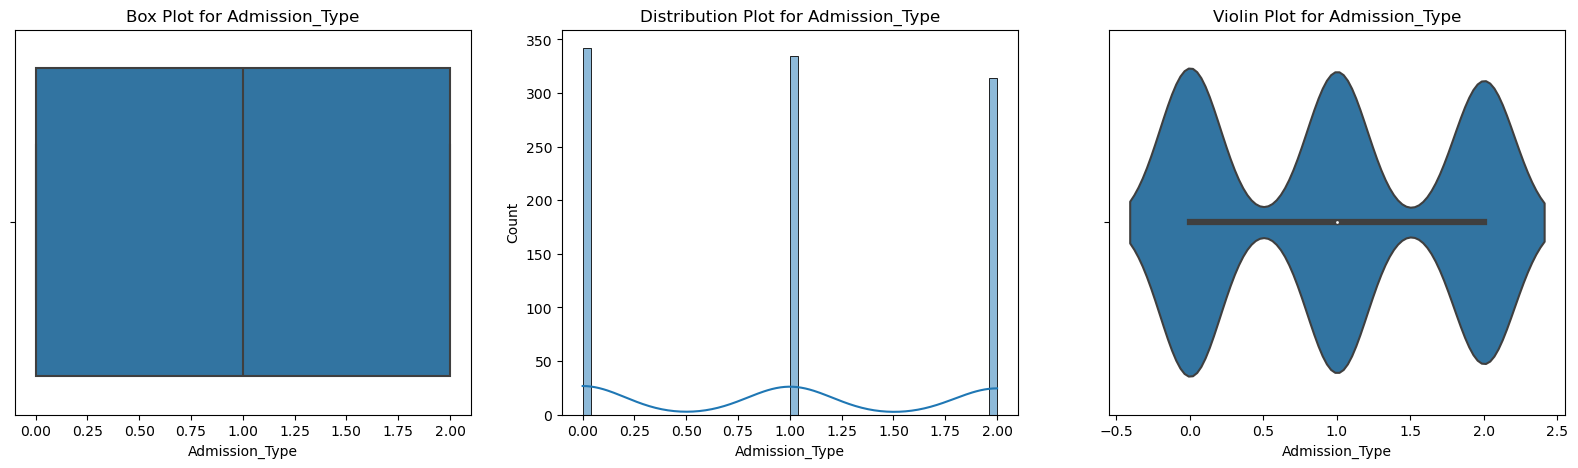

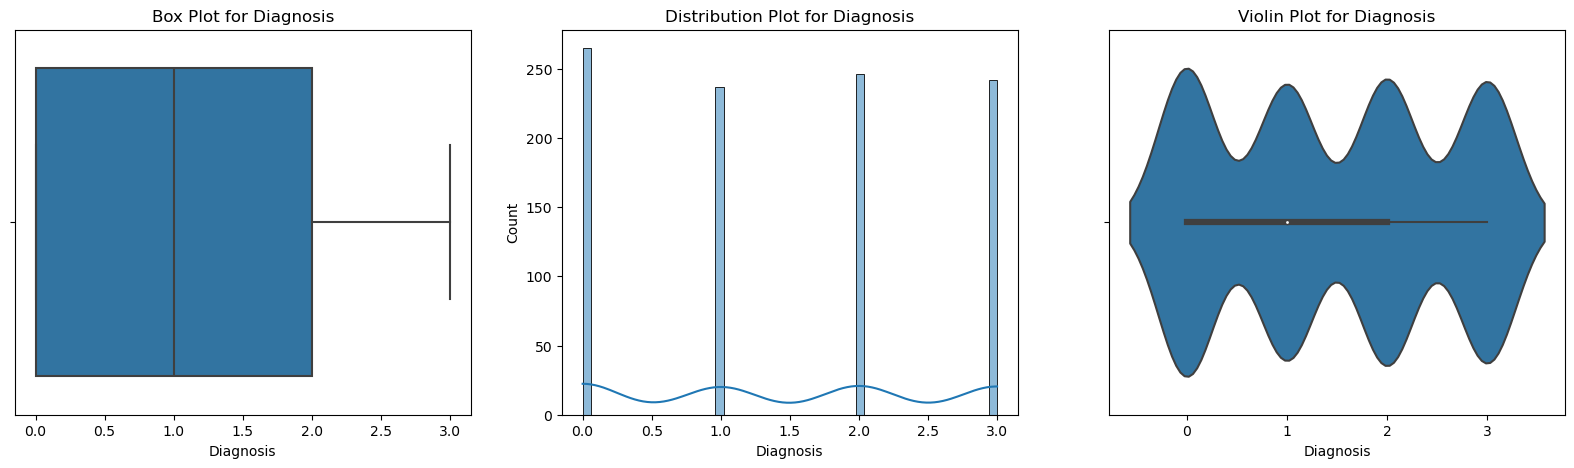

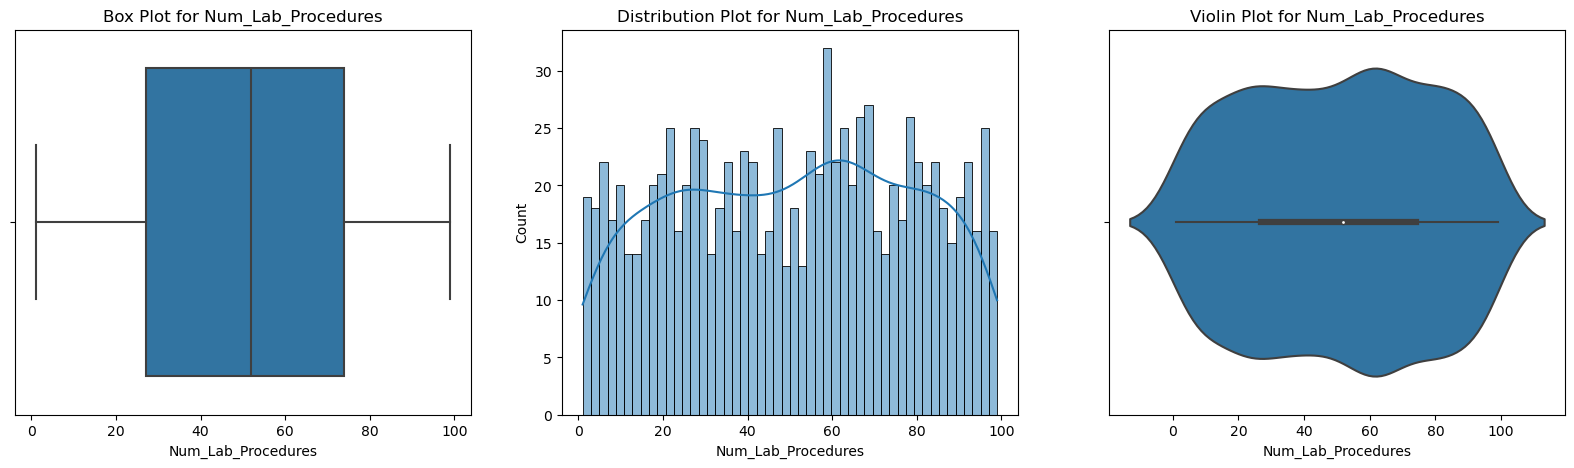

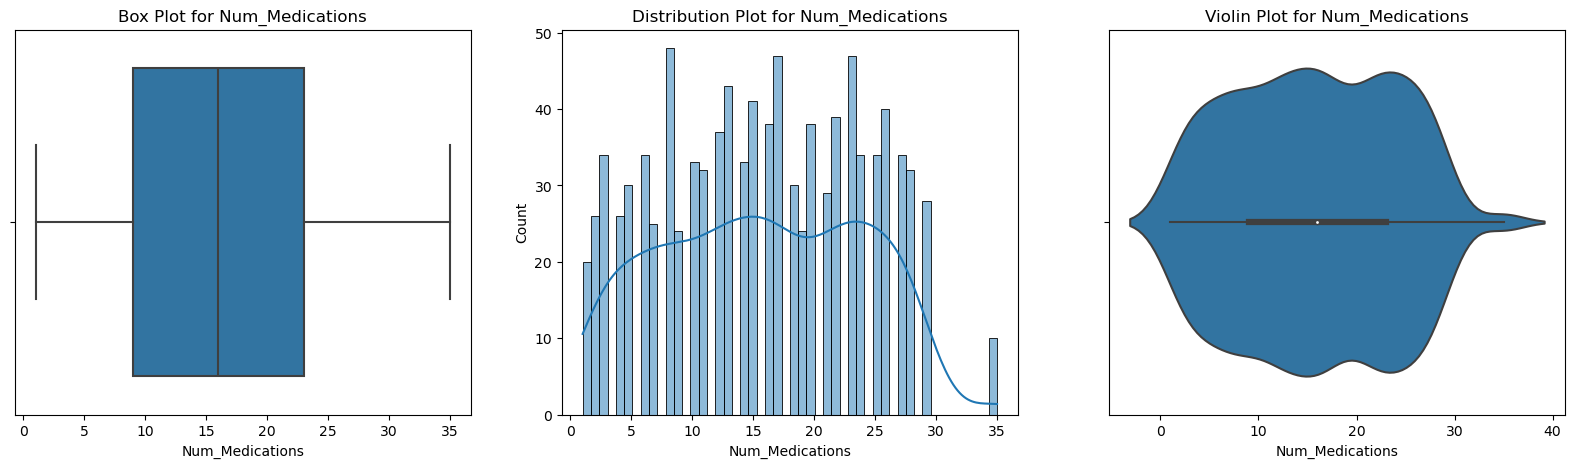

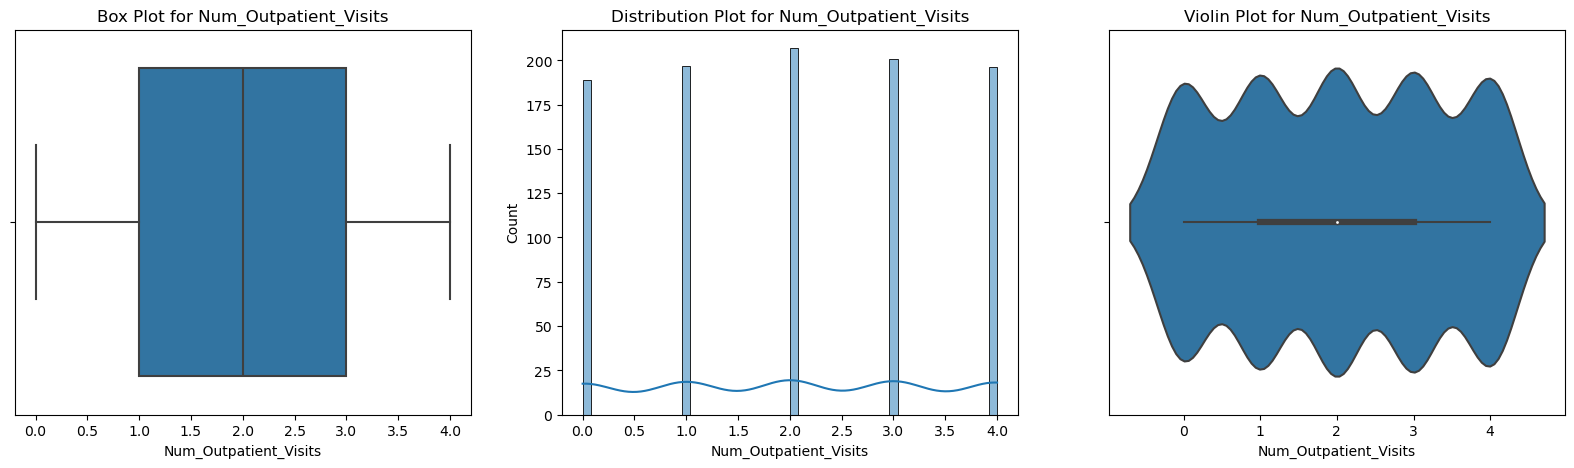

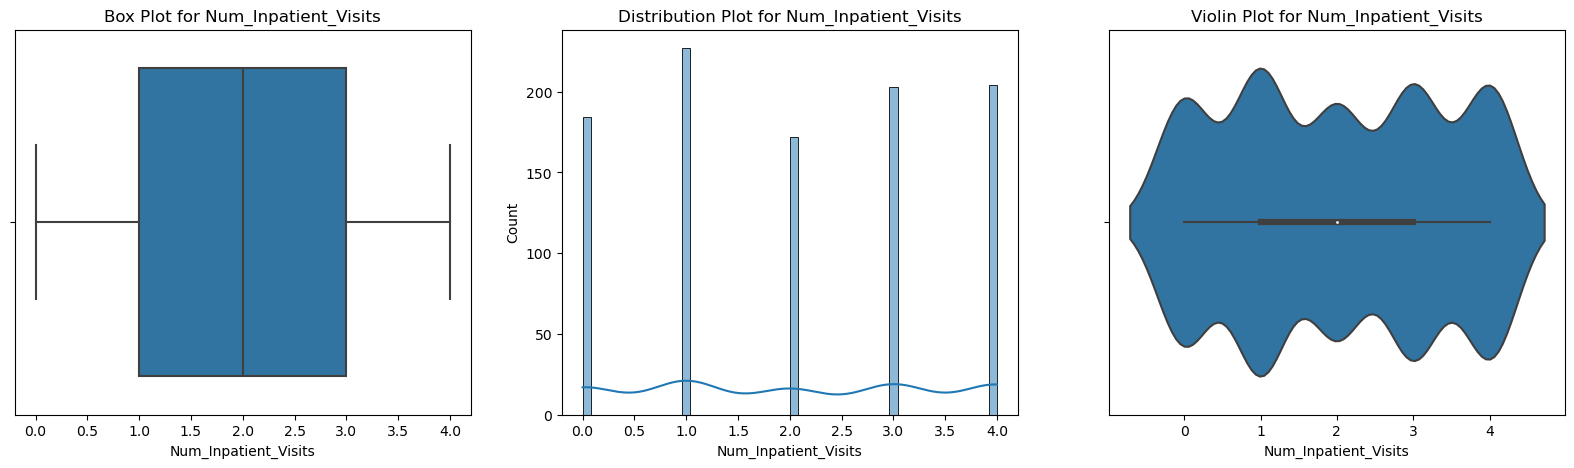

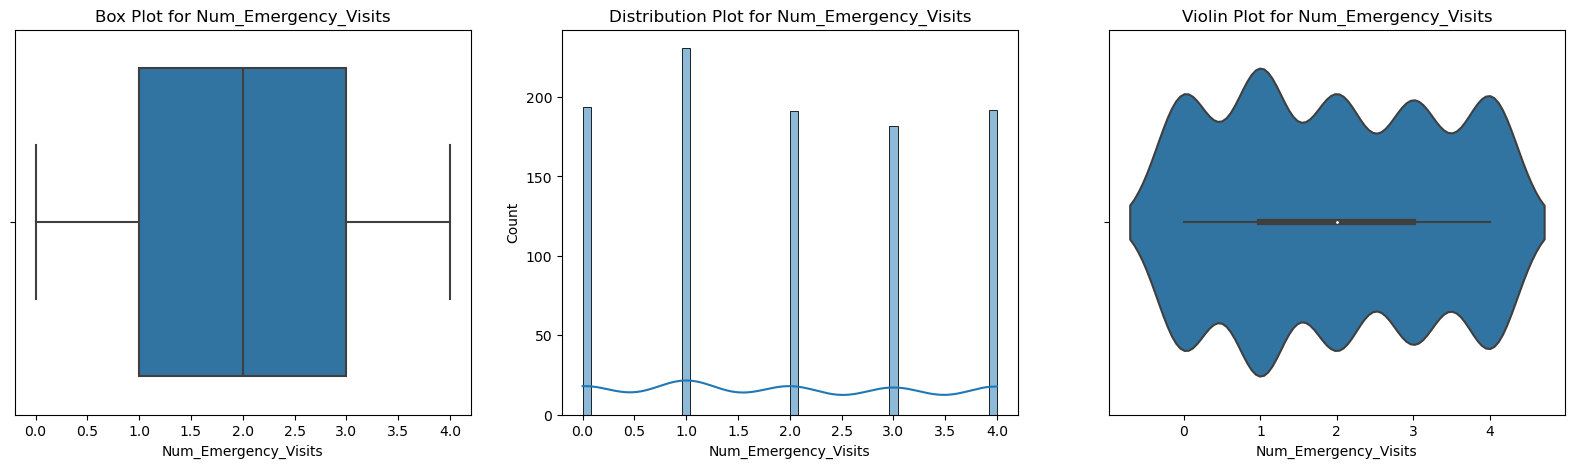

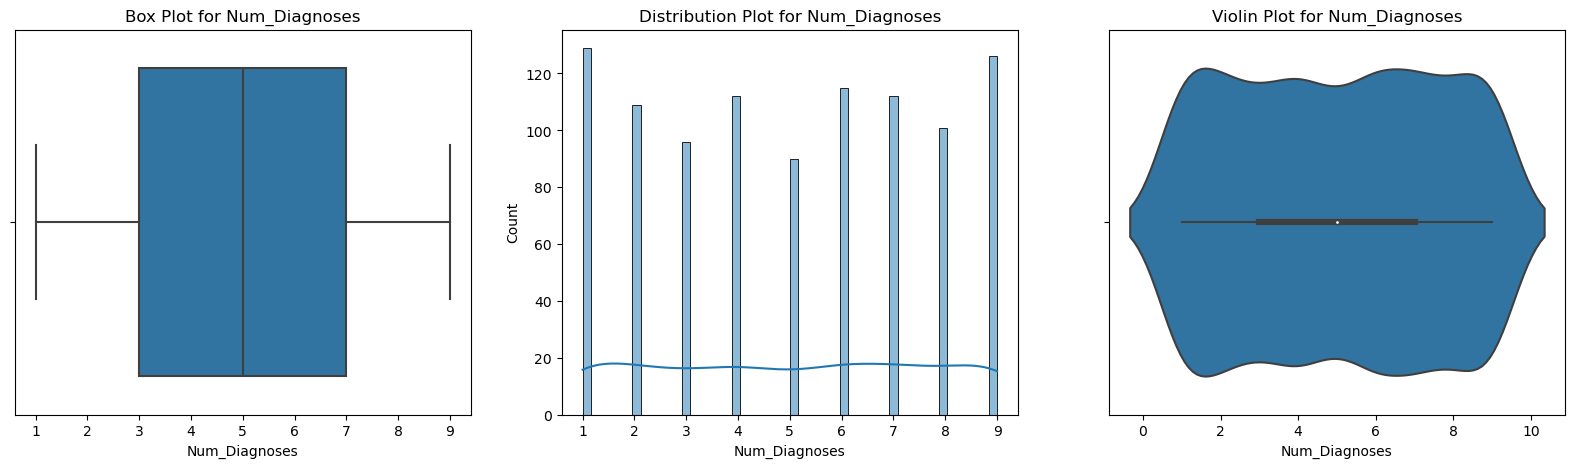

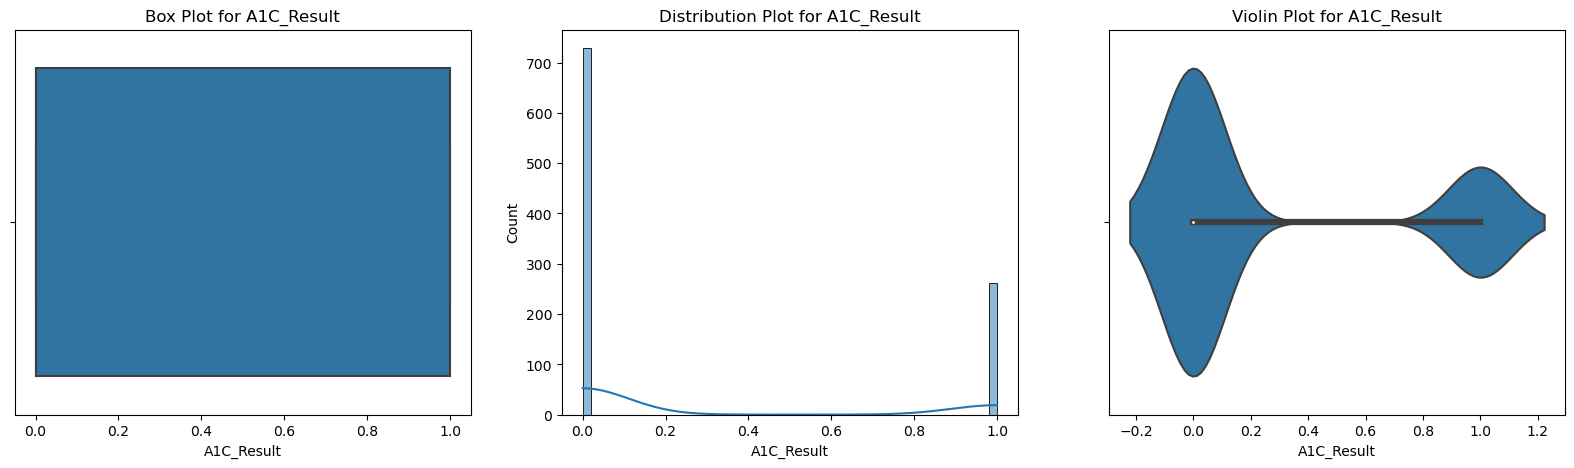

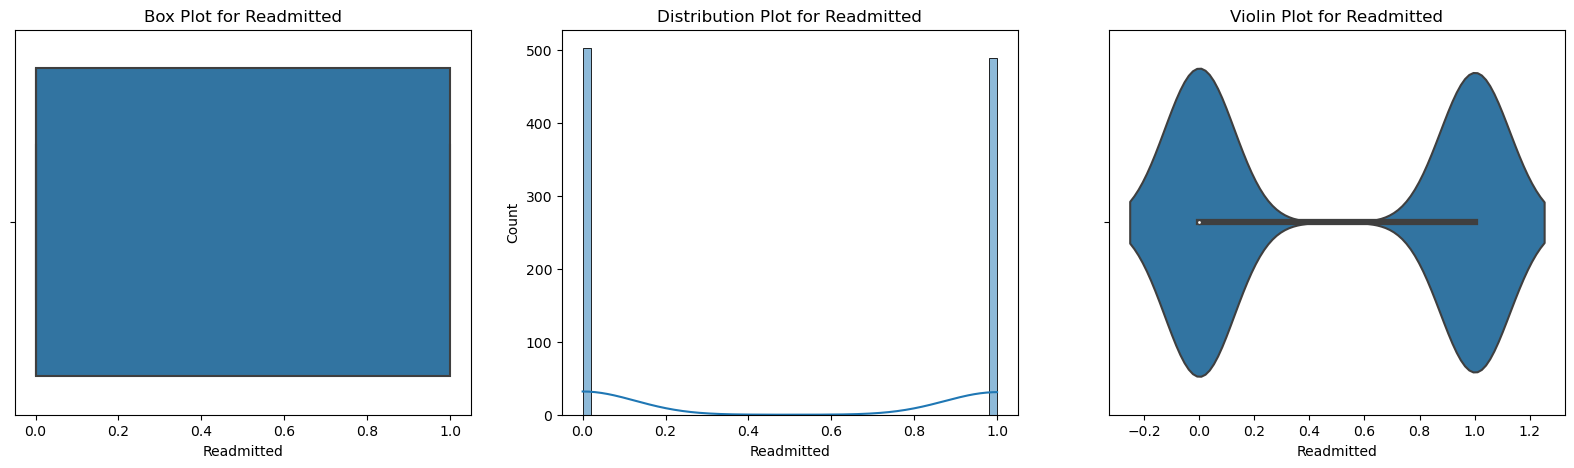

In [28]:
for i in ['Patient_ID','Age','Gender','Admission_Type','Diagnosis','Num_Lab_Procedures','Num_Medications','Num_Outpatient_Visits','Num_Inpatient_Visits','Num_Emergency_Visits','Num_Diagnoses','A1C_Result','Readmitted']:
    plot(df,i)

In [113]:
df.describe()

,Patient_ID,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted,service_utilization,Age Group,Age_Diagnosis_Interaction,Heart Disease_Severity,Diabetes_Severity,Injury_Severity,Infection_Severity
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,504.994949,50.671717,0.979798,0.971717,1.469697,50.697980,15.719192,2.018182,2.016162,1.946465,4.998990,0.263636,0.492929,5.980808,1.626263,7.974747,1.818182,1.406061,0.600000,1.301010
std,286.770863,19.739924,0.807946,0.813938,1.128987,28.035343,8.222631,1.399723,1.415550,1.405666,2.665929,0.440827,0.500203,2.430143,1.094021,4.485046,3.697521,2.633448,1.198921,2.543116
min,1.000000,18.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,258.250000,34.000000,0.000000,0.000000,0.000000,27.000000,9.000000,1.000000,1.000000,1.000000,3.000000,0.000000,0.000000,4.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,505.500000,50.000000,1.000000,1.000000,1.000000,52.000000,16.000000,2.000000,2.000000,2.000000,5.000000,0.000000,0.000000,6.000000,2.000000,8.000000,0.000000,0.000000,0.000000,0.000000
75%,752.750000,68.000000,2.000000,2.000000,2.000000,74.000000,23.000000,3.000000,3.000000,3.000000,7.000000,1.000000,1.000000,8.000000,3.000000,12.000000,0.000000,2.000000,0.000000,0.000000
max,1000.000000,84.000000,2.000000,2.000000,3.000000,99.000000,35.000000,4.000000,4.000000,4.000000,9.000000,1.000000,1.000000,12.000000,3.000000,15.000000,12.000000,8.000000,4.000000,8.000000


In [106]:
corrl=df.corr()
corrl

,Patient_ID,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted,service_utilization,Age Group,Age_Diagnosis_Interaction,Heart Disease_Severity,Diabetes_Severity,Injury_Severity,Infection_Severity
Patient_ID,1.000000,-0.016565,-0.012351,0.054516,0.018633,-0.017374,-0.056455,-0.086263,0.037420,0.011252,0.019233,-0.014362,-0.002993,-0.021381,-0.014712,-0.009664,-0.015745,-0.024848,0.049175,-0.022804
Age,-0.016565,1.000000,0.037052,0.048886,-0.039578,0.019054,-0.046604,0.023820,-0.032051,-0.024028,-0.012995,0.016114,0.031254,-0.018849,-0.193576,-0.198836,0.212783,0.273144,0.175124,0.243729
Gender,-0.012351,0.037052,1.000000,0.026806,-0.006214,-0.033883,0.011169,-0.012192,-0.018280,-0.026772,0.025340,-0.030454,0.009654,-0.033156,-0.030285,-0.031114,-0.011046,-0.006596,0.024008,0.026583
Admission_Type,0.054516,0.048886,0.026806,1.000000,0.039779,0.047835,-0.058144,0.026189,-0.042604,-0.011930,-0.022846,-0.015832,-0.000492,-0.016633,0.021047,0.030549,0.023151,-0.020110,0.039166,0.012910
Diagnosis,0.018633,-0.039578,-0.006214,0.039779,1.000000,-0.102754,-0.031742,-0.032283,0.011062,-0.037659,-0.018319,0.004894,0.028268,-0.033933,-0.031282,0.221201,-0.204783,-0.695756,0.679029,0.240541
Num_Lab_Procedures,-0.017374,0.019054,-0.033883,0.047835,-0.102754,1.000000,-0.001408,0.031086,0.049628,-0.038897,-0.013614,-0.003696,-0.006101,0.024314,-0.039650,-0.064553,0.016305,0.100036,-0.052722,-0.070526
Num_Medications,-0.056455,-0.046604,0.011169,-0.058144,-0.031742,-0.001408,1.000000,0.000883,0.024019,0.057310,0.071713,0.012634,-0.027771,0.047649,0.046320,0.037205,0.014016,-0.006683,-0.016944,-0.034830
Num_Outpatient_Visits,-0.086263,0.023820,-0.012192,0.026189,-0.032283,0.031086,0.000883,1.000000,0.002403,0.034927,-0.025195,-0.053659,0.050729,0.597586,0.044720,0.035507,0.001812,0.061086,-0.022173,-0.017446
Num_Inpatient_Visits,0.037420,-0.032051,-0.018280,-0.042604,0.011062,0.049628,0.024019,0.002403,1.000000,-0.045299,0.023315,-0.048964,-0.028399,0.557679,0.039161,0.040995,0.013505,-0.044618,-0.043254,0.038531
Num_Emergency_Visits,0.011252,-0.024028,-0.026772,-0.011930,-0.037659,-0.038897,0.057310,0.034927,-0.045299,1.000000,0.033713,0.021168,-0.001258,0.572160,-0.034721,-0.043357,-0.000513,0.015985,-0.018119,-0.013307


# Data Visualization

<Axes: xlabel='Readmitted', ylabel='count'>

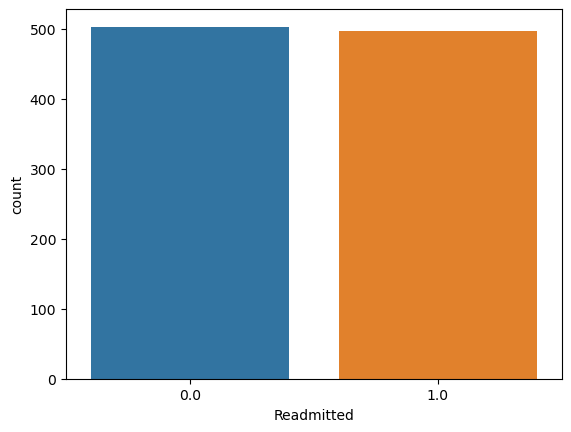

In [26]:
sns.countplot(x="Readmitted",data=df)

<Axes: xlabel='Admission_Type', ylabel='count'>

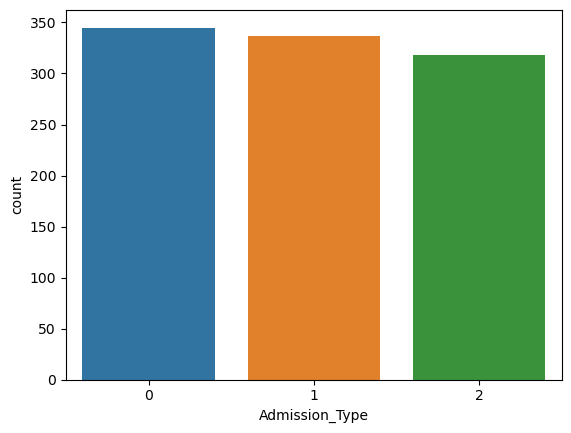

In [43]:
sns.countplot(x="Admission_Type",data=df)

<Axes: xlabel='Age', ylabel='Count'>

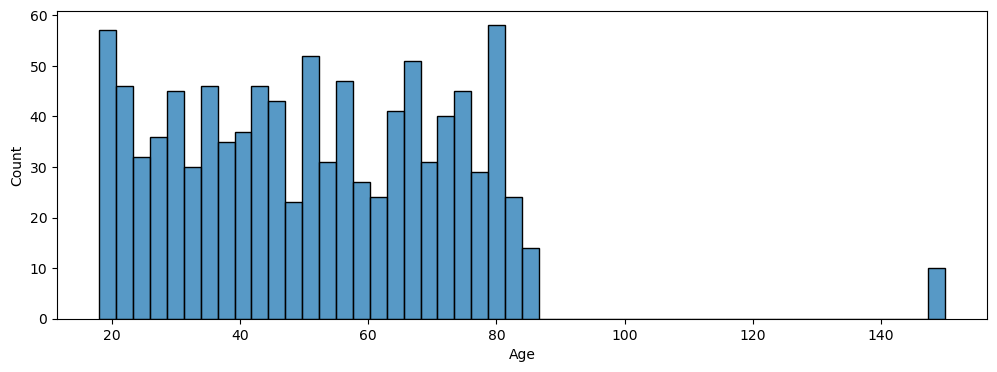

In [82]:
plt.figure(figsize=(12,4))
sns.histplot(df['Age'],bins=50)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


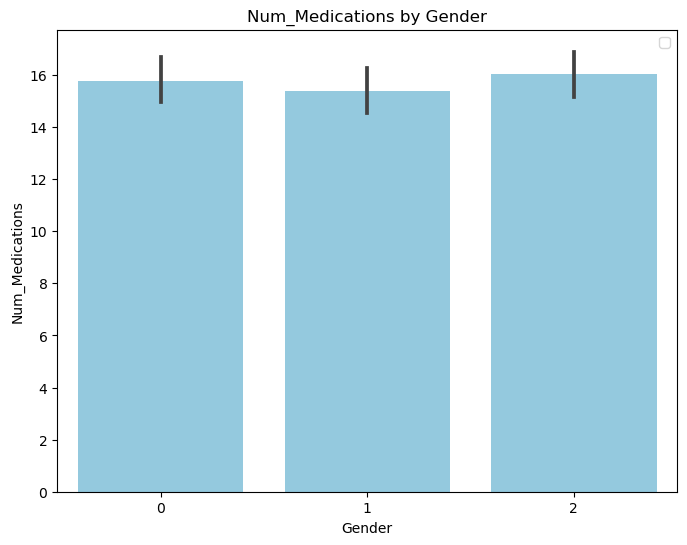

In [112]:
# Plot the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Num_Medications', data=df, color='skyblue')
plt.xlabel('Gender')
plt.ylabel('Num_Medications')
plt.title('Num_Medications by Gender')
plt.legend()
plt.show()

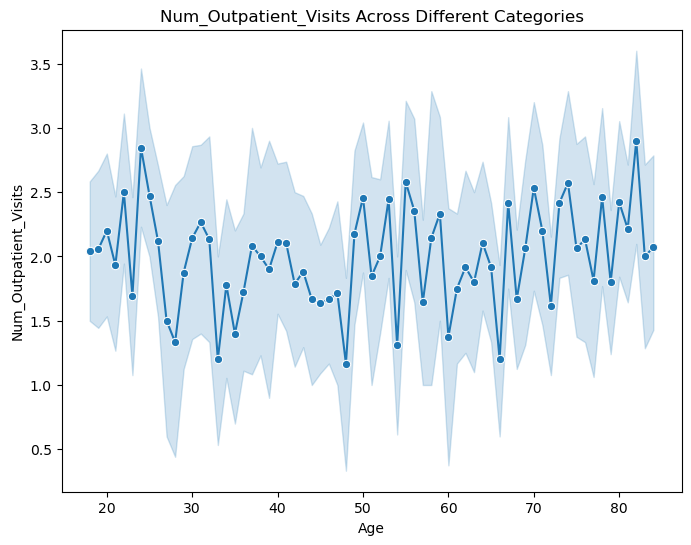

In [115]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='Age', y='Num_Outpatient_Visits', data=df, marker='o')
plt.xlabel('Age')
plt.ylabel('Num_Outpatient_Visits')
plt.title('Num_Outpatient_Visits Across Different Categories')
plt.show()

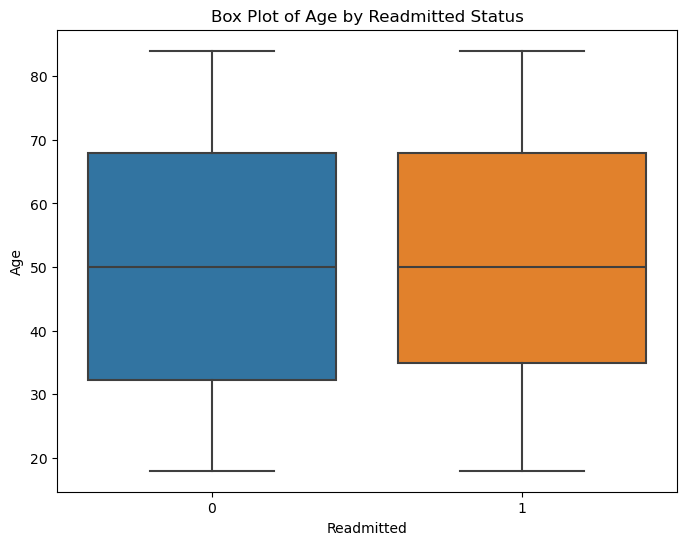

In [126]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Readmitted', y='Age', data=df)
plt.xlabel('Readmitted')
plt.ylabel('Age')
plt.title('Box Plot of Age by Readmitted Status')
plt.show()

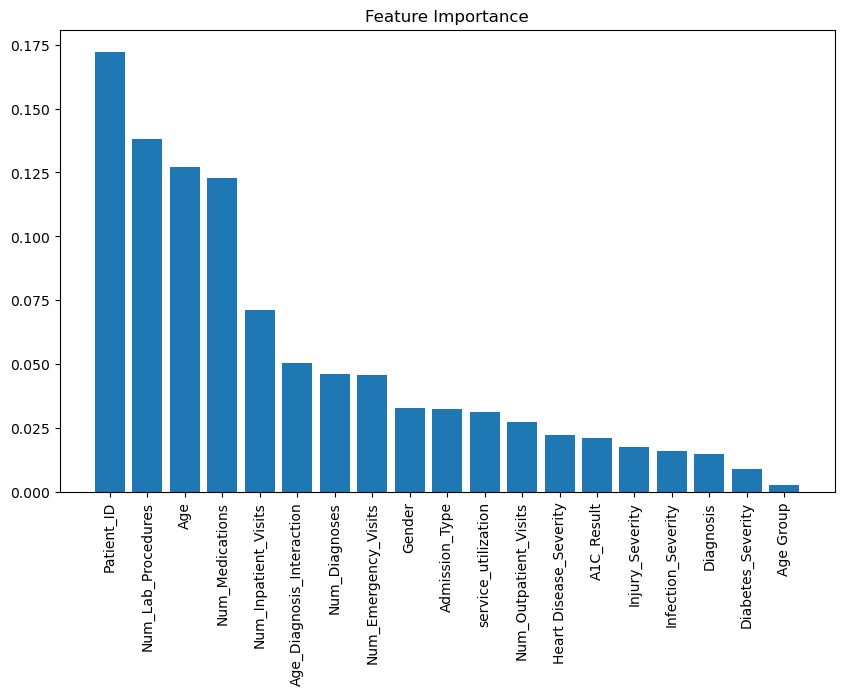

In [141]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

# Load the Iris dataset (or replace it with your dataset)
x = df.drop(columns=['Readmitted'], axis=1)
y = df['Readmitted']


feature_names = ['Patient_ID','Age','Gender','Admission_Type','Diagnosis','Num_Lab_Procedures','Num_Medications','Num_Outpatient_Visits','Num_Inpatient_Visits','Num_Emergency_Visits','Num_Diagnoses','A1C_Result','service_utilization','Age Group','Age_Diagnosis_Interaction','Heart Disease_Severity','Diabetes_Severity','Injury_Severity','Infection_Severity']

# Train a random forest classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(x, y)

# Get feature importances
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names based on feature importances
names = [feature_names[i] for i in indices]

# Create plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(x.shape[1]), importances[indices])
plt.xticks(range(x.shape[1]), names, rotation=90)
plt.show()

In [157]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load your dataset (replace 'your_dataset.csv' with the path to your dataset)
data = df

# Select features and target variable
# selected_features = ['Num_Lab_Procedures', 'Num_Medications', 'Age']
selected_features = ['Num_Lab_Procedures', 'Num_Medications', 'Age',
                     'Num_Inpatient_Visits']      
target_variable = 'Readmitted'

# Prepare feature matrix X and target vector y
X = data[selected_features]
y = data[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForestClassifier
clf =  DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [None, 5, 10, 15],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required at each leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Maximum number of features to consider for splitting
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the model with the best hyperparameters
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with Best Hyperparameters:", accuracy)

# # Train the model
# clf.fit(X_train, y_train)

# # Predict on the testing set
# y_pred = clf.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy with Best Hyperparameters: 0.5151515151515151


In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Split the data into features (X) and target variable (y)
X = df_new.drop(columns=["Readmitted"])  # Features
#X = X.drop(columns=["service_utilization"]) 
y = df["Readmitted"]  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_test.shape

(200,)

In [67]:
df.head()

,Patient_ID,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted,service_utilization
0,1,69,2,1,1,33,2,4,1,1,5,0,1,6
1,2,32,0,2,0,81,10,4,4,1,6,0,0,9
2,3,78,0,2,1,75,29,4,0,3,5,1,0,7
3,4,38,1,0,0,77,11,2,3,4,9,0,1,9
4,5,41,0,2,0,50,25,3,4,1,3,0,1,8


In [159]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Split the data into features (X) and target variable (y)
X = df.drop(columns=["Readmitted"])  # Features
#X = X.drop(columns=["service_utilization"]) 
y = df["Readmitted"]  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
logreg_classifier = LogisticRegression(max_iter=1000, random_state=42)
logreg_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_classifier.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[52 47]
 [58 41]]

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.53      0.50        99
           1       0.47      0.41      0.44        99

    accuracy                           0.47       198
   macro avg       0.47      0.47      0.47       198
weighted avg       0.47      0.47      0.47       198



In [132]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split the data into features (X) and target variable (y)
X = df.drop(columns=["Readmitted"])  # Features
#X = X.drop(columns=["service_utilization"]) 
y = df["Readmitted"]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[63 36]
 [70 29]]

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.64      0.54        99
           1       0.45      0.29      0.35        99

    accuracy                           0.46       198
   macro avg       0.46      0.46      0.45       198
weighted avg       0.46      0.46      0.45       198



In [196]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Load your dataset (replace 'your_dataset.csv' with the path to your dataset)
data = df

# Select features and target variable
selected_features = ['Age','Num_Lab_Procedures', 'Num_Medications', 
                     'Num_Outpatient_Visits', 'Num_Inpatient_Visits', 'Num_Emergency_Visits', 'Num_Diagnoses'
                     ]
target_variable = 'Readmitted'


# Prepare feature matrix X and target vector y
X = data[selected_features]
y = data[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize AdaBoostClassifier
ada_clf = AdaBoostClassifier(random_state=42)

# Train AdaBoostClassifier
ada_clf.fit(X_train, y_train)

# Predict on the testing set
y_pred_ada = ada_clf.predict(X_test)

# Evaluate AdaBoostClassifier
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print("Accuracy with AdaBoostClassifier:", accuracy_ada)

# Initialize GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(random_state=42)

# Train GradientBoostingClassifier
gb_clf.fit(X_train, y_train)

# Predict on the testing set
y_pred_gb = gb_clf.predict(X_test)

# Evaluate GradientBoostingClassifier
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy with GradientBoostingClassifier:", accuracy_gb)


new_data_point = [[50, 2, 5, 1, 0, 2, 3]]

# Predict using AdaBoostClassifier
y_pred_ada_new_point = ada_clf.predict(new_data_point)

# Predict using GradientBoostingClassifier
y_pred_gb_new_point = gb_clf.predict(new_data_point)

# Print predicted values
print("Predicted value using AdaBoostClassifier:", y_pred_ada_new_point[0])
print("Predicted value using GradientBoostingClassifier:", y_pred_gb_new_point[0])


import pickle
with open('gradient_model.pkl', 'wb') as f:
    pickle.dump(gb_clf, f)

Accuracy with AdaBoostClassifier: 0.5454545454545454
Accuracy with GradientBoostingClassifier: 0.5
Predicted value using AdaBoostClassifier: 0
Predicted value using GradientBoostingClassifier: 0


In [211]:
import pickle
with open('gradient_model.pkl', 'rb') as f:
    model = pickle.load(f)
new_data_point = [[55, 1, 5, 1, 3, 2, 2]]
y_pred = model.predict(new_data_point)
if y_pred[0] == 1:
    print('Readmission')
else:
    print('No Readmission')

No Readmission
